# <center>Decision Tree<center>

<p>Team Name:  B.C.
<p>Student Names: Brittney Jarreau, Caleb Charpentier, Leanne Nicholas
<p>Student W#s: 0455857, 0650629, 0670945

## Imports

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from collections import Counter
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import sklearn.model_selection as model_selection
from sklearn import metrics
from sklearn.svm import SVC # "Support vector classifier"
from seaborn import pairplot

# PART I

## Prepare Data

In [2]:
data = pd.read_csv("./Acoustic_Probing.csv")
data = data.drop(["ID", "Trial"], axis=1)
data = data.drop(data.loc[:, data.nunique() == 1], axis=1)

#When the csv reads in, it detects an extra row of NaN
data = data.dropna()

le = preprocessing.LabelEncoder()
data["Label"] = le.fit_transform(data["Label"].values)

display(data)

,Tx Amplitude at -7,Tx Amplitude at -6,Tx Amplitude at -5,Tx Amplitude at -4,Tx Amplitude at -3,Tx Amplitude at -2.5,Tx Amplitude at -2,Tx Amplitude at -1.5,Tx Amplitude at -1,Tx Amplitude at -0.5,...,Tx Phase at -2,Tx Phase at -1.5,Tx Phase at -1,Tx Phase at -0.5,Tx Phase at 0,Tx Phase at 1,Tx Phase at 2,Tx Phase at 3,Tx Phase at 4,Label
0,0.001891,0.002083,0.004218,0.003733,0.018894,0.026597,0.027009,0.019226,0.025426,0.028832,...,0.503352,0.840757,0.634943,0.372477,0.053777,-0.220244,-2.933058,0.824031,-1.844182,0
1,0.001893,0.002078,0.004217,0.003736,0.018893,0.026582,0.027067,0.019299,0.025406,0.028816,...,0.501344,0.841286,0.635073,0.372084,0.051594,-0.210717,-2.900116,0.824106,-1.845349,0
2,0.001893,0.002078,0.004215,0.003734,0.018896,0.026557,0.027070,0.019292,0.025359,0.028769,...,0.499483,0.841865,0.633659,0.372149,0.052261,-0.218682,-2.892752,0.826299,-1.844914,0
3,0.001896,0.002073,0.004215,0.003732,0.018891,0.026565,0.027061,0.019285,0.025356,0.028755,...,0.498892,0.841142,0.634215,0.371543,0.050770,-0.212246,-2.902221,0.829220,-1.843085,0
4,0.001892,0.002078,0.004216,0.003732,0.018900,0.026538,0.027081,0.019307,0.025351,0.028718,...,0.499417,0.841852,0.633126,0.372358,0.050326,-0.221953,-2.903675,0.826953,-1.843601,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.002440,0.001665,0.005208,0.005654,0.024287,0.041308,0.047161,0.057018,0.055985,0.040206,...,0.969952,0.753171,0.753971,0.594004,0.546144,-0.937365,2.757576,-0.053014,-1.509498,1
176,0.002439,0.001665,0.005213,0.005645,0.024236,0.041296,0.047157,0.057023,0.056035,0.040234,...,0.969666,0.752937,0.754755,0.593920,0.546005,-0.936613,2.756994,-0.052055,-1.509360,1
177,0.002434,0.001666,0.005211,0.005647,0.024247,0.041288,0.047138,0.057030,0.056002,0.040201,...,0.969572,0.752219,0.754181,0.593789,0.544501,-0.936233,2.757578,-0.051381,-1.510605,1
178,0.002431,0.001667,0.005206,0.005656,0.024226,0.041285,0.047134,0.057031,0.055954,0.040211,...,0.969181,0.753023,0.754354,0.594127,0.544593,-0.936405,2.756899,-0.050440,-1.507303,1


Text(0.5, 1.0, 'Correlation between different features')

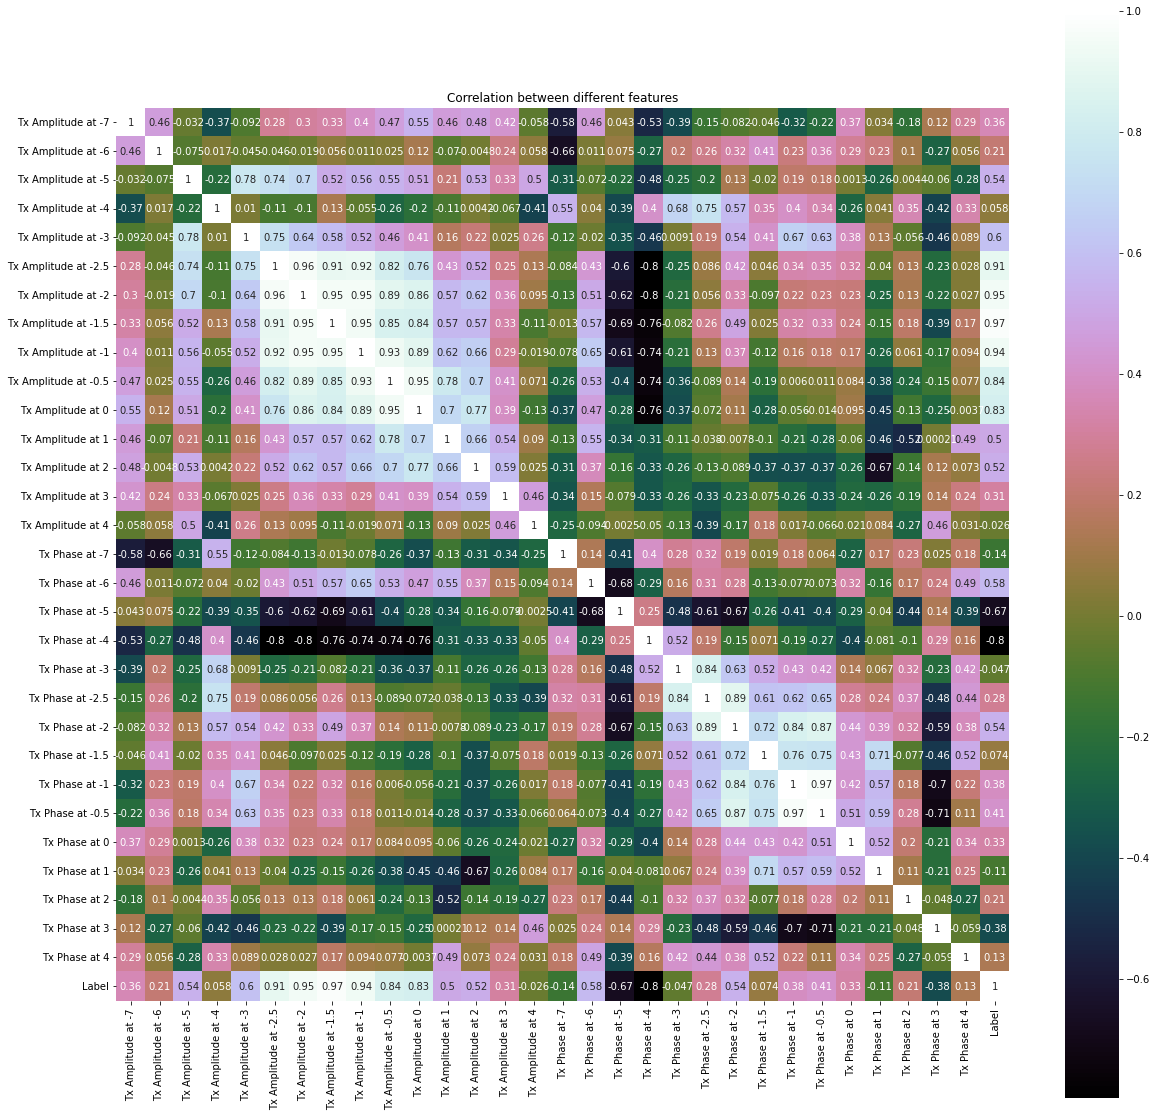

In [3]:
#correlation matrix using heatmap.
corelationBetweenCols = data.corr();
plt.figure(figsize=(20,20))
sns.heatmap(corelationBetweenCols, vmax=1, square=True, annot=True, cmap='cubehelix')
plt.title('Correlation between different features')

Text(0.5, 1.0, 'Correlation between different features')

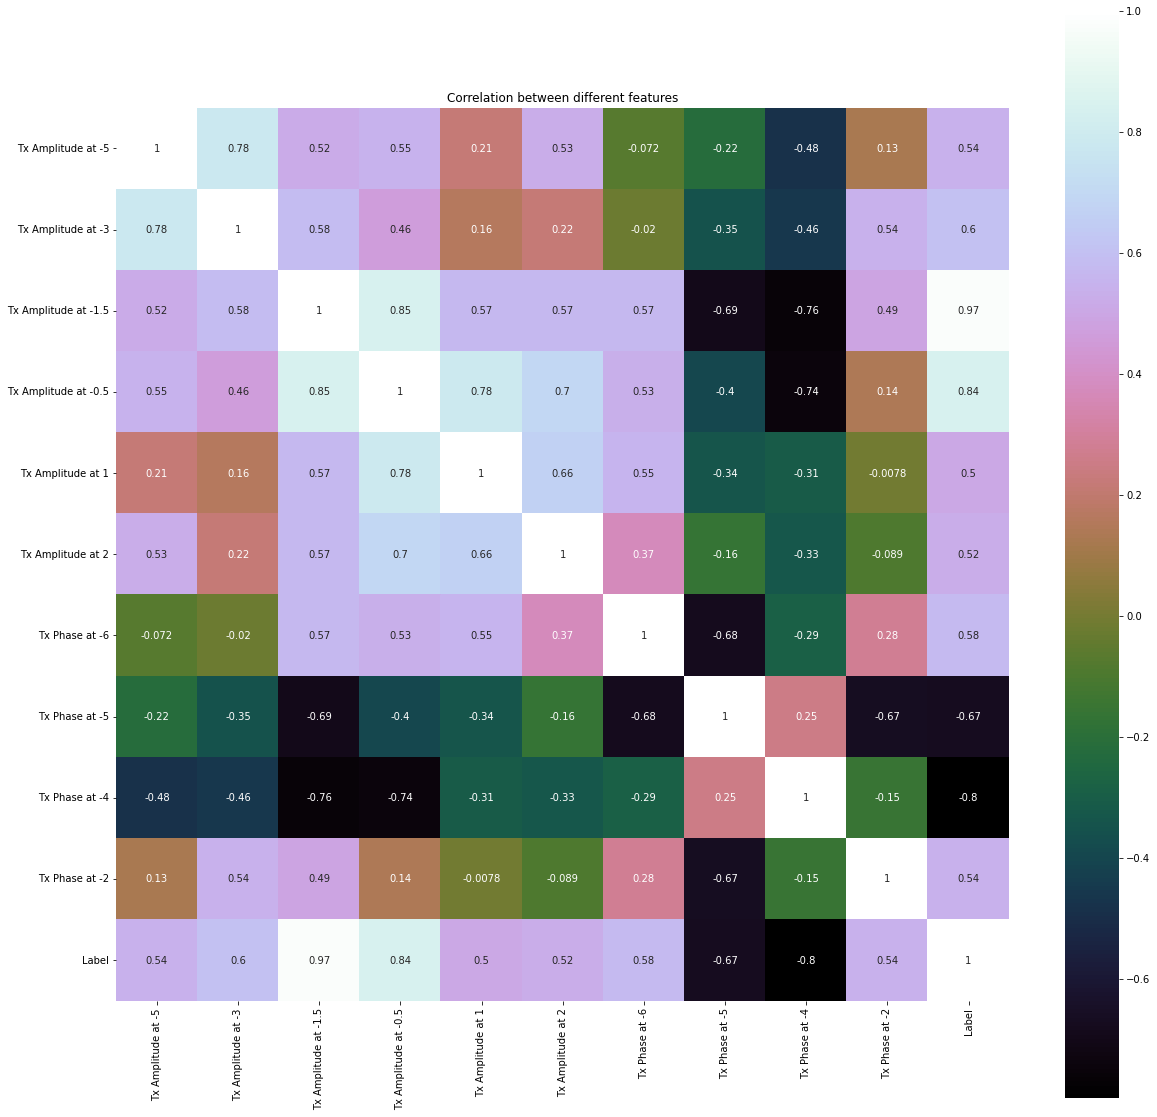

In [4]:
data = data.drop(["Tx Amplitude at -2.5", "Tx Amplitude at -2", "Tx Amplitude at -1", "Tx Amplitude at 0", "Tx Phase at -2.5", "Tx Phase at -1.5", "Tx Phase at -1"], axis=1) # reduce highly correlated fields
# drop fields that are not correlated to the label, this task is expensive so we are dropping anything under 50%
data = data.drop(["Tx Amplitude at -7", "Tx Amplitude at -4", "Tx Amplitude at -6", "Tx Amplitude at 3", "Tx Amplitude at 4", "Tx Phase at -7", "Tx Phase at -3", "Tx Phase at -0.5", "Tx Phase at 0", "Tx Phase at 1", "Tx Phase at 2", "Tx Phase at 3", "Tx Phase at 4"], axis=1) 

corelationBetweenCols = data.corr();
plt.figure(figsize=(20,20))
sns.heatmap(corelationBetweenCols, vmax=1, square=True, annot=True, cmap='cubehelix')
plt.title('Correlation between different features')


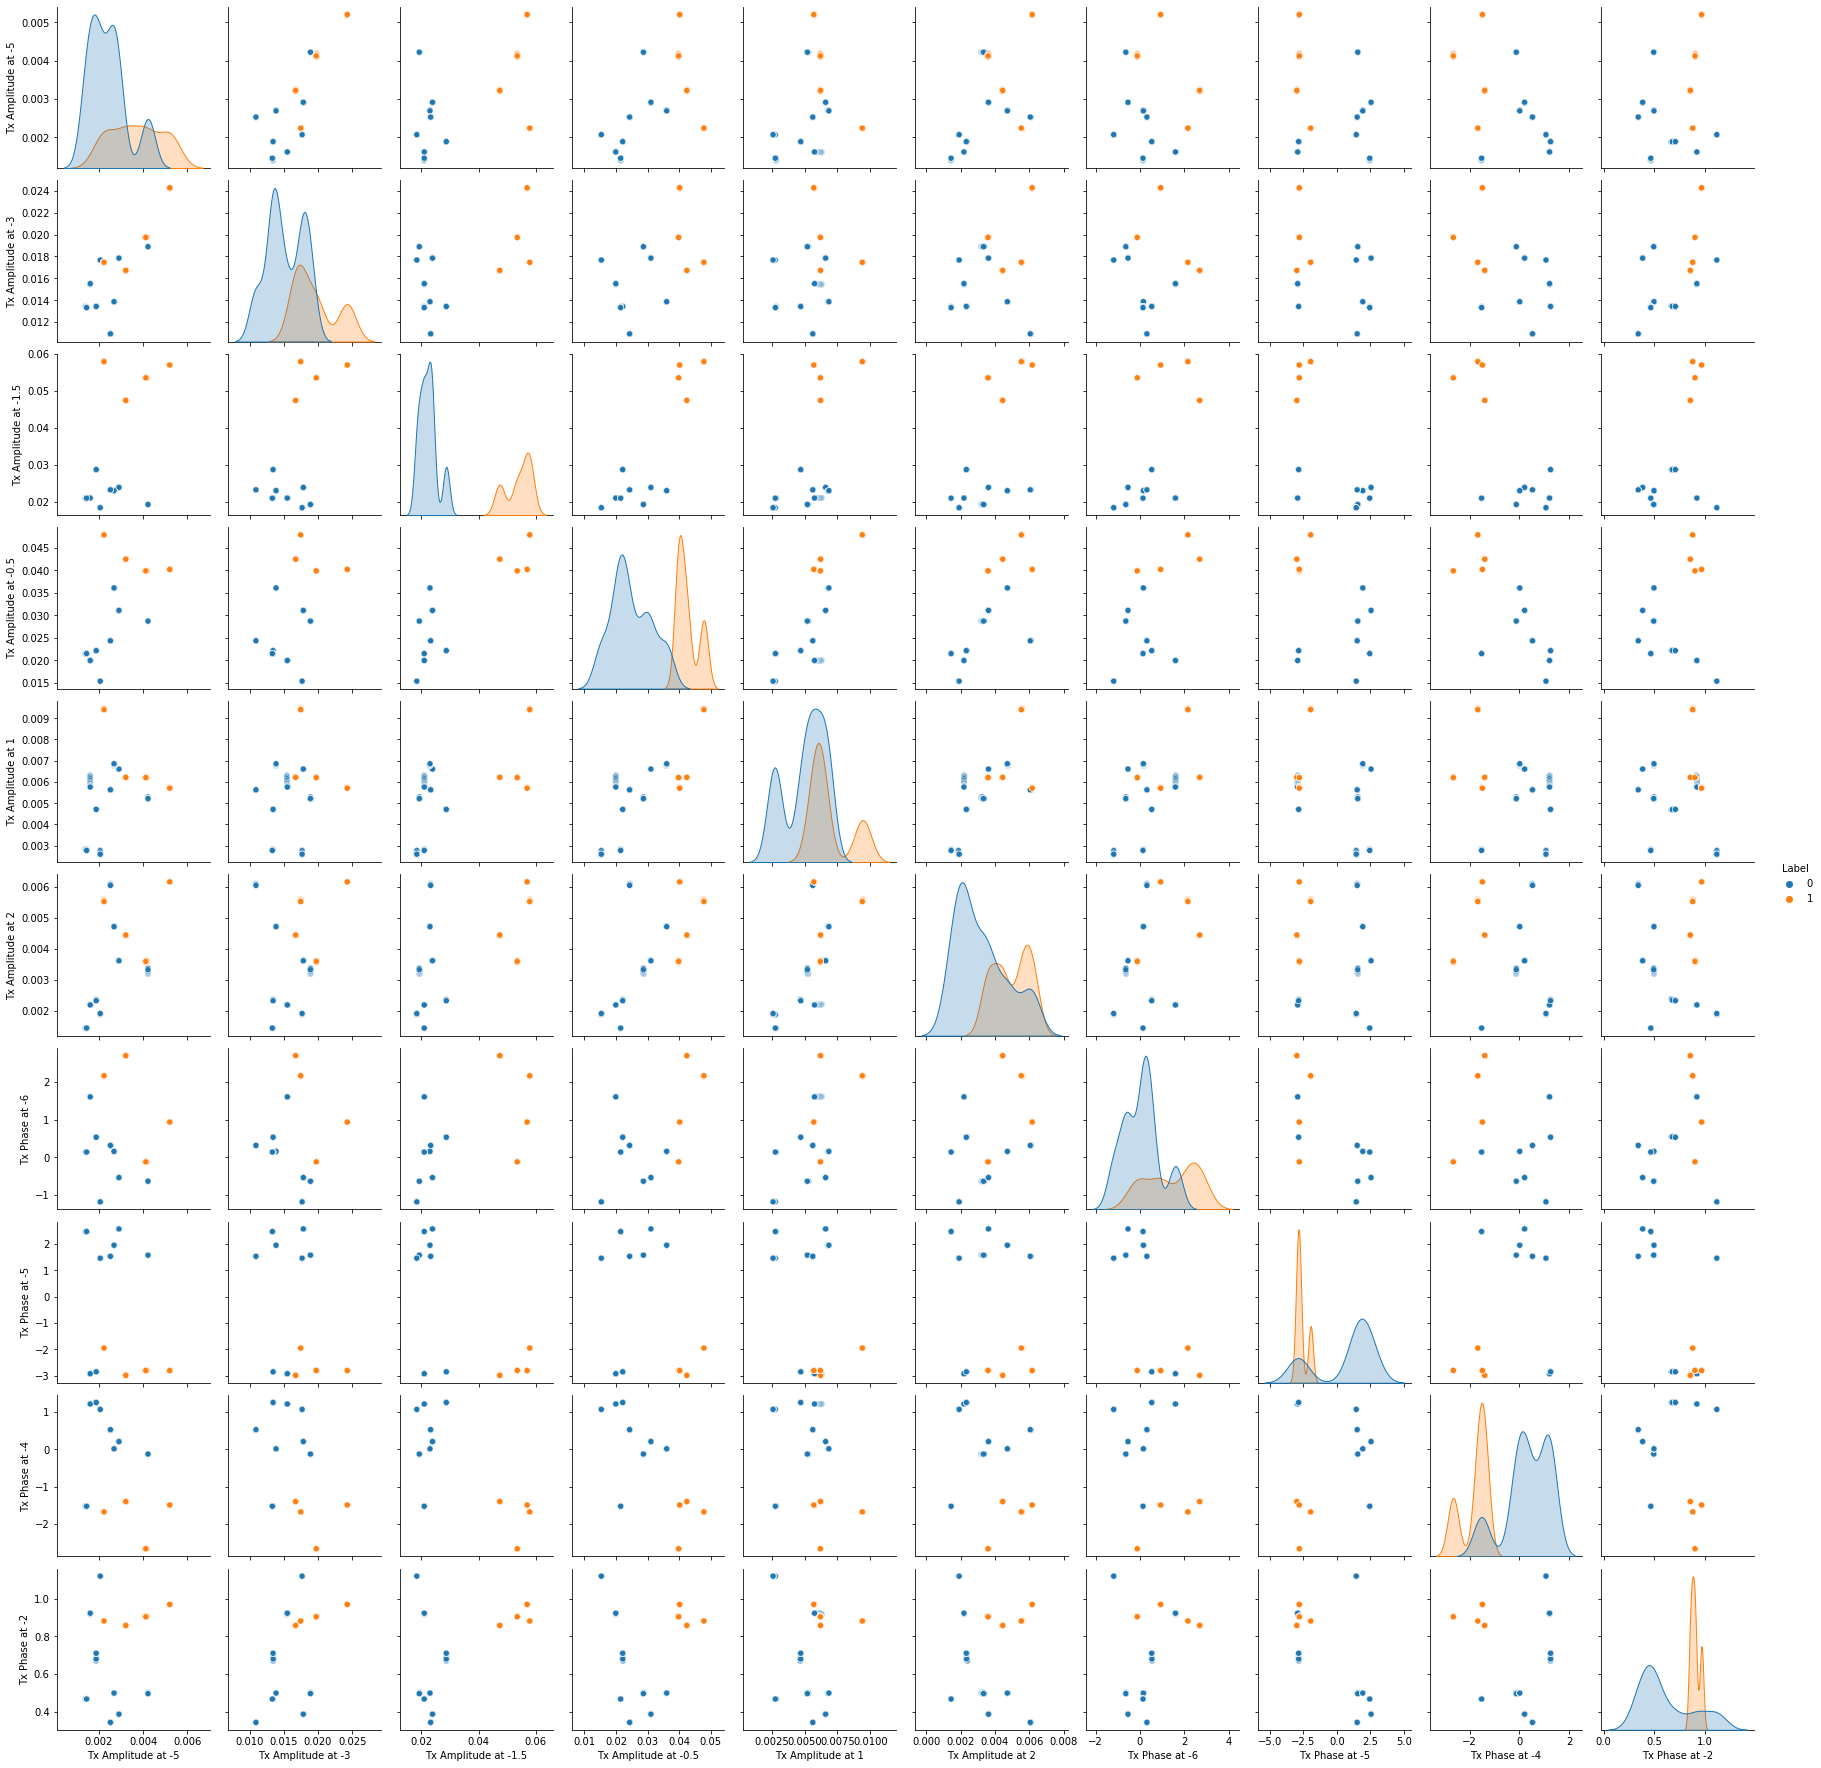

In [5]:
pairplot(data, hue='Label')
plt.show()

samples = data.drop(["Label"], axis=1)
labels = data.Label
X_train, X_test, y_train, y_test = model_selection.train_test_split(samples, labels, train_size=0.70,test_size=0.30, random_state=42)

<b>Generate a decision tree by means of a Python library</b>
- Use 70% of the data for training and 30% for testing.
- Compare performance of the model based on “gini” and “entropy” measures. As a performance measure use sensitivity, specificity, AUC, and F1-score
- Plot performance measures on a single figure for “gini” and “entropy”. Group by performance measures.

No handles with labels found to put in legend.


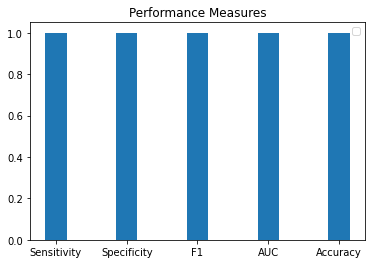

In [13]:
def get_scores(acc, labels, prediction):
    f1 = metrics.f1_score(labels, prediction)
    conf_matrix = metrics.confusion_matrix(labels, prediction)
    sens = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
    spec = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])
    auc = metrics.roc_auc_score(labels, prediction)
    return sens, spec, f1, auc, acc

def add_plots(f1, sens, spec, auc, title):
  plt.bar(1, sens, label="{} Sensitivity".format(title))
  plt.bar(2, spec, label="{} Specificity".format(title))
  plt.bar(3, auc, label="{} AUC".format(title))
  plt.bar(4, f1, label="{} F1".format(title))

def decision_function(model, ax = None, plot_support = True):
   if ax is None:
      ax = plt.gca()
   xlim = ax.get_xlim()
   ylim = ax.get_ylim()

clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
acc = accuracy_score(y_test, predictions)
sens, spec, f1, AUC, acc = get_scores(acc, y_test, predictions)
values = [sens, spec, f1, AUC, acc]

w = clf.coef_[0]
b = clf.intercept_[0]
x_visual = np.linspace(32,57)
y_visual = -(w[0] / w[1]) * x_visual - b / w[1]

labels = ["Sensitivity", "Specificity", "F1", "AUC", "Accuracy"]
plt.title("Performance Measures")
width =0.3
plt.xticks(range(len(labels)), labels)
plt.bar(np.arange(len(values)), values, width=width)
plt.legend()
plt.show()



## <center> REFERENCES </center>
List resources (book, internet page, etc.) that you used to complete this challenge.

https://pythonbasics.org/matplotlib-bar-chart/
https://www.statology.org/auc-in-python/
https://gist.github.com/jaradc/eeddf20932c0347928d0da5a09298147#:~:text=Four%20different%20ways%20to%20calculate%20entropy%20in%20Python,%28%20labels%2C%20return_counts%3DTrue%29%20return%20entropy%20%28%20counts%2C%20base%3Dbase%29
https://datagy.io/python-support-vector-machines/